In [6]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats


# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss


In [7]:
# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
#Reading csv file 
df = pd.read_csv("product_reviews.csv")
df


,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Terrific purchase,It is very very nice and it's is Battery prefo...,5
1,1,Good choice,Best Samsung phone in this price range.Good ba...,4
2,2,Good choice,"Amazing smartphone.\nCamera , battery back up ...",4
3,3,Excellent,This smartphone is very good in camera and bat...,5
4,4,Really Nice,First I would like to thank you Flipkart for f...,4
...,...,...,...,...
27819,27819,Super!,After a long time a awesome purchase. Just lov...,5
27820,27820,Wonderful,I am very happy,5
27821,27821,Wonderful,Supper quality thank you for Flipkart,5
27822,27822,Very Good,excellent product...,4


In [9]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [10]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 27824 Rows and 3 Columns in the dataset


In [11]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_title', 'Review_text', 'Ratings'], dtype='object')


In [12]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27824 entries, 0 to 27823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  27824 non-null  object
 1   Review_text   27824 non-null  object
 2   Ratings       27824 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 652.2+ KB


In [13]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_title    0
Review_text     0
Ratings         0
dtype: int64


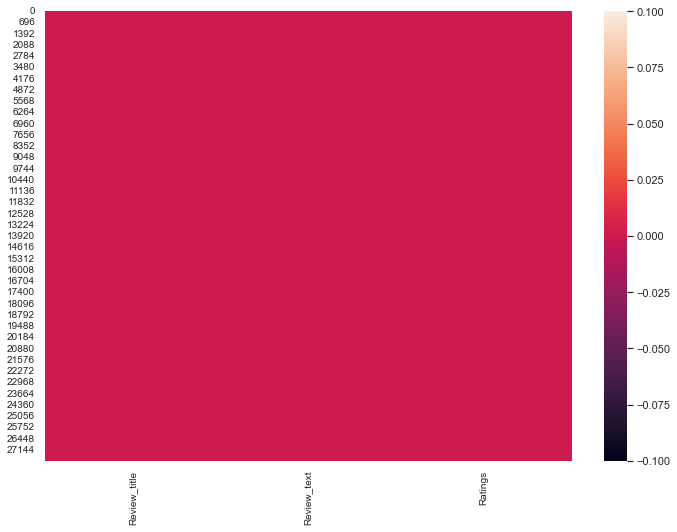

In [14]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Let's have a look into target column:


In [15]:
# Checking the unique value count of target column
df['Ratings'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

# Now let's combine Review_Title and Review_Text to make a single column Review:


In [16]:
# Combining Review text and title
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']

In [17]:
df

,Review_title,Review_text,Ratings,Review
0,Terrific purchase,It is very very nice and it's is Battery prefo...,5,Terrific purchase It is very very nice and it'...
1,Good choice,Best Samsung phone in this price range.Good ba...,4,Good choice Best Samsung phone in this price r...
2,Good choice,"Amazing smartphone.\nCamera , battery back up ...",4,"Good choice Amazing smartphone.\nCamera , batt..."
3,Excellent,This smartphone is very good in camera and bat...,5,Excellent This smartphone is very good in came...
4,Really Nice,First I would like to thank you Flipkart for f...,4,Really Nice First I would like to thank you Fl...
...,...,...,...,...
27819,Super!,After a long time a awesome purchase. Just lov...,5,Super! After a long time a awesome purchase. J...
27820,Wonderful,I am very happy,5,Wonderful I am very happy
27821,Wonderful,Supper quality thank you for Flipkart,5,Wonderful Supper quality thank you for Flipkart
27822,Very Good,excellent product...,4,Very Good excellent product...


In [18]:
# Dropping unnecessary column
df.drop(columns = 'Review_title',inplace = True)
df.drop(columns = 'Review_text',inplace = True)

# Let's have a look into our Review column and see first 2 entries how the data looks:


In [19]:
# Checking data of first row in Review column
df['Review'][0]

"Terrific purchase It is very very nice and it's is Battery preformance is awesome it can for 3days and it performance of the chip inside super more faster .camera also good ."

In [20]:
# Checking data of first row in Review column
df['Review'][1]

'Good choice Best Samsung phone in this price range.Good battery back up.Decent Display.Fast fingerprint sensor.Rear camera quality is good.front camera is not up to the mark.90 Hz refresh rate is good.Good user interface.updated to one ui 3.1.there are some pre installed apps which can only be disabled.sound quality is low comparing with other smartphones in same price segment.using in low screen bightness noticed screen flickering.There is no screen protector or case in the box.Takes 160 minutes for ful...\nREAD MORE'

# Text Processing:


In [21]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [22]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

# Let's have a look into our text again:


# 

In [23]:
# Checking data of first row in Review column again
df['Review'][0]

'terrific purchase it is very very nice and it is is battery preformance is awesome it can for 3days and it performance of the chip inside super more faster camera also good '

In [24]:
# Checking data of first row in Review column again
df['Review'][1]

'good choice best samsung phone in this price rangegood battery back updecent displayfast fingerprint sensorrear camera quality is goodfront camera is not up to the mark90 hz refresh rate is goodgood user interfaceupdated to one ui 31there are some pre installed apps which can only be disabledsound quality is low comparing with other smartphones in same price segmentusing in low screen bightness noticed screen flickeringthere is no screen protector or case in the boxtakes 160 minutes for ful read more'

# Removing StopWords:


In [28]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [29]:
# Checking the text data again
df['Review'][0]

'terrific purchase nice battery preformance awesome 3days performance chip inside super faster camera also good'

In [30]:
# Checking the text data again
df['Review'][1]

'good choice best samsung phone price rangegood battery back updecent displayfast fingerprint sensorrear camera quality goodfront camera mark90 hz refresh rate goodgood user interfaceupdated one ui 31there pre installed apps disabledsound quality low comparing smartphones price segmentusing low screen bightness noticed screen flickeringthere screen protector case boxtakes 160 minutes ful read'

# Lemmatization:

In [37]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [38]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [39]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [44]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [45]:
# Checking the text data again
df['Review'][0]

'terrific purchase nice battery preformance awesome 3days performance chip inside super faster camera also good'

In [46]:
# Checking the text data again
df['Review'][1]

'good choice best samsung phone price rangegood battery back updecent displayfast fingerprint sensorrear camera quality goodfront camera mark90 hz refresh rate goodgood user interfaceupdated one ui 31there pre instal apps disabledsound quality low compare smartphones price segmentusing low screen bightness notice screen flickeringthere screen protector case boxtakes 160 minute ful read'

# Visualization

# i) Word Counts:


In [47]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,15,terrific purchase nice battery preformance awe...
1,51,good choice best samsung phone price rangegood...
2,32,good choice amaze smartphone camera battery ba...
3,15,excellent smartphone good camera battery value...
4,24,really nice first would like thank flipkart fa...


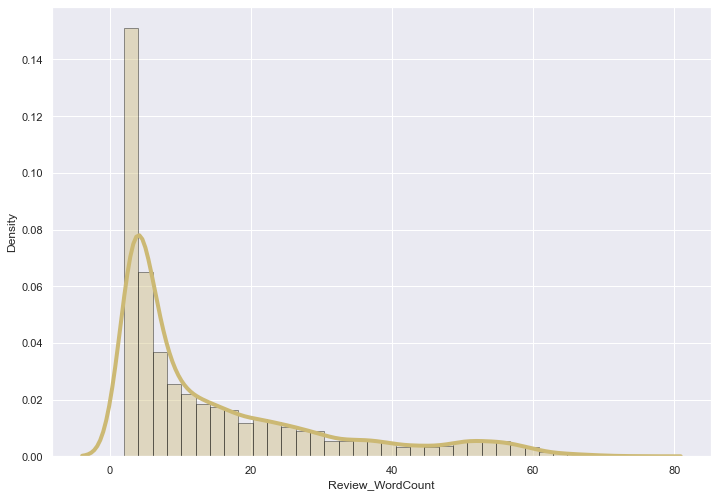

In [49]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Character count:

In [50]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,110,terrific purchase nice battery preformance awe...
1,387,good choice best samsung phone price rangegood...
2,214,good choice amaze smartphone camera battery ba...
3,99,excellent smartphone good camera battery value...
4,166,really nice first would like thank flipkart fa...


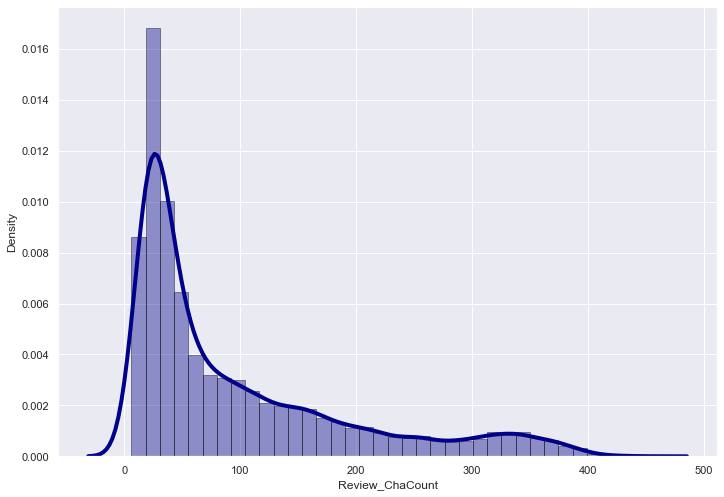

In [51]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Removing Outliers:


In [52]:
#Checking the shape of the dataset
df.shape

(27824, 4)

In [53]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(27580, 4)

# Plotting histograms for word count and character counts again after removing outliers:


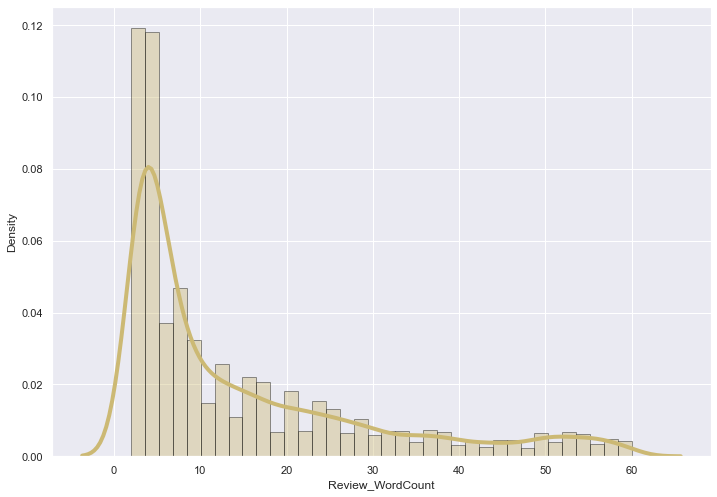

In [54]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

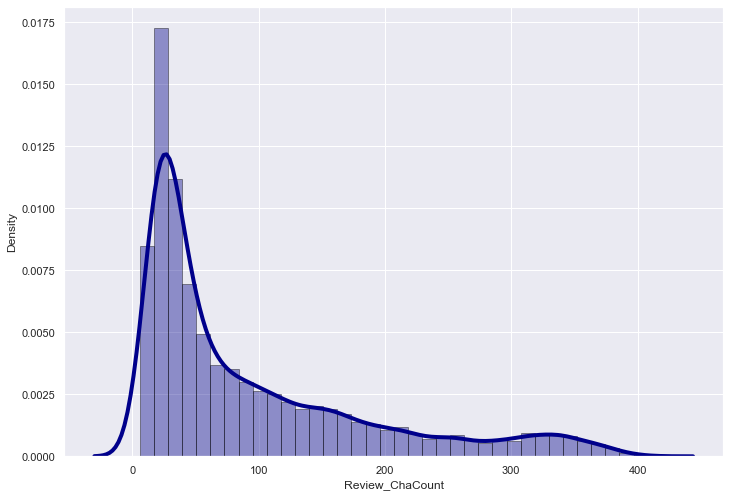

In [55]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# iii) Top 30 most frequently occuring words:


In [56]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

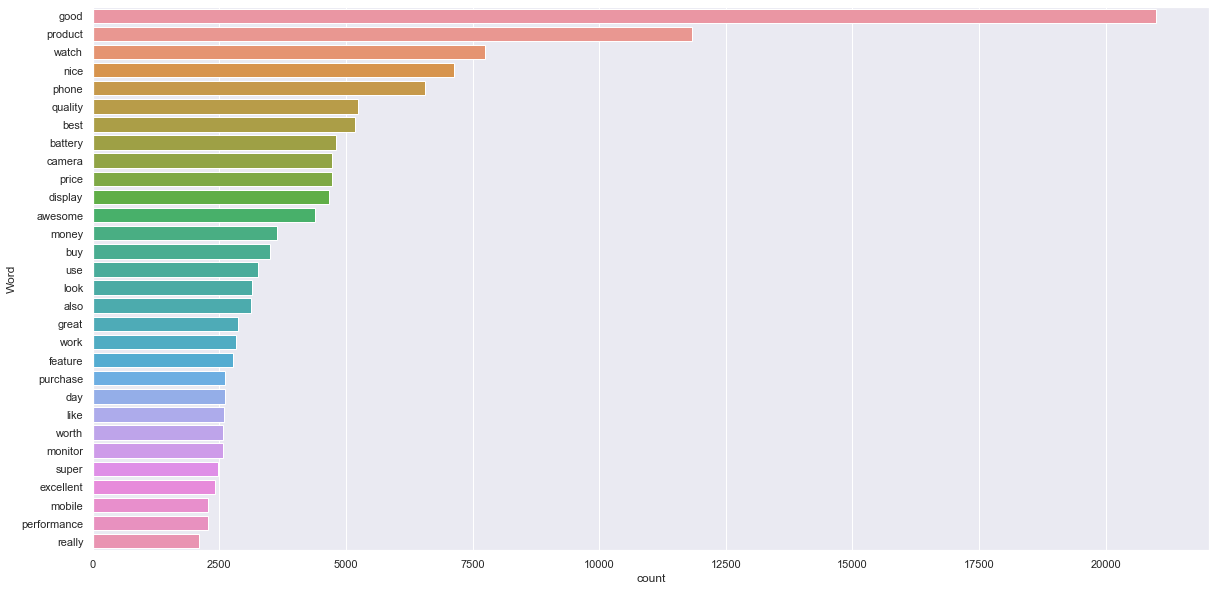

In [57]:
freq_words(df['Review'])

# iv) Top 30 Rare words:


In [58]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

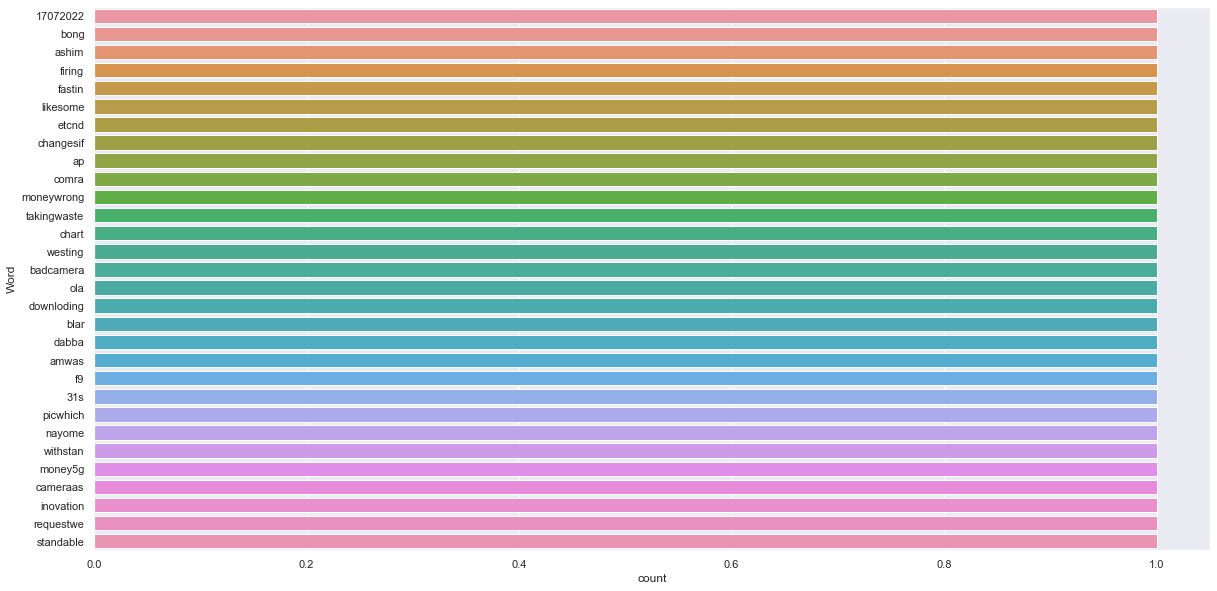

In [59]:
rare_words(df['Review'])

# v) Word cloud:


In [62]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [61]:
pip install WordCloud

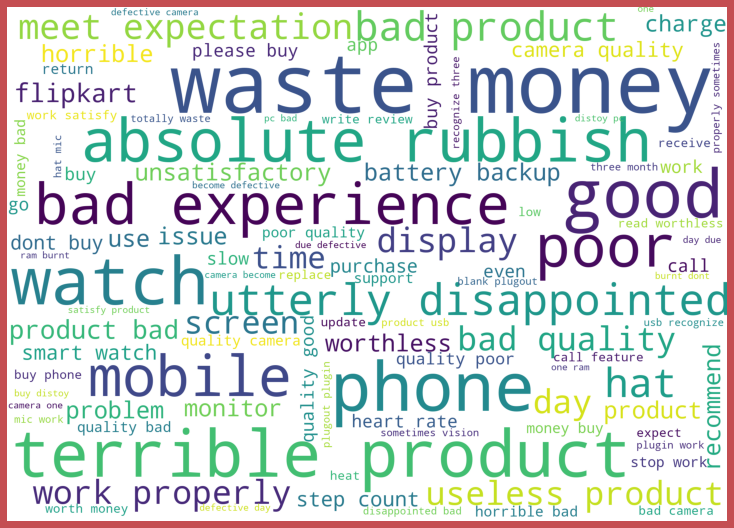

In [63]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

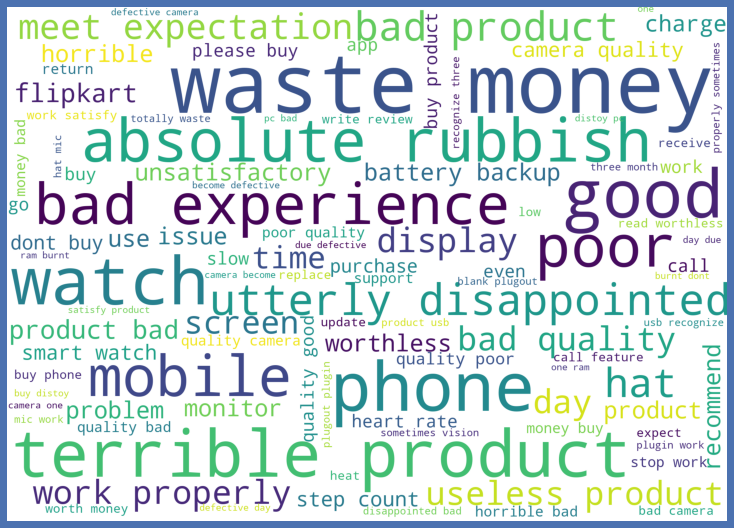

In [64]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

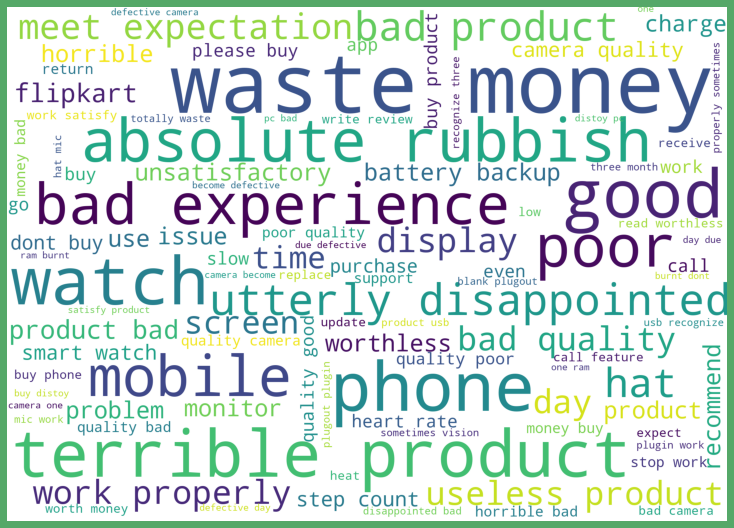

In [65]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

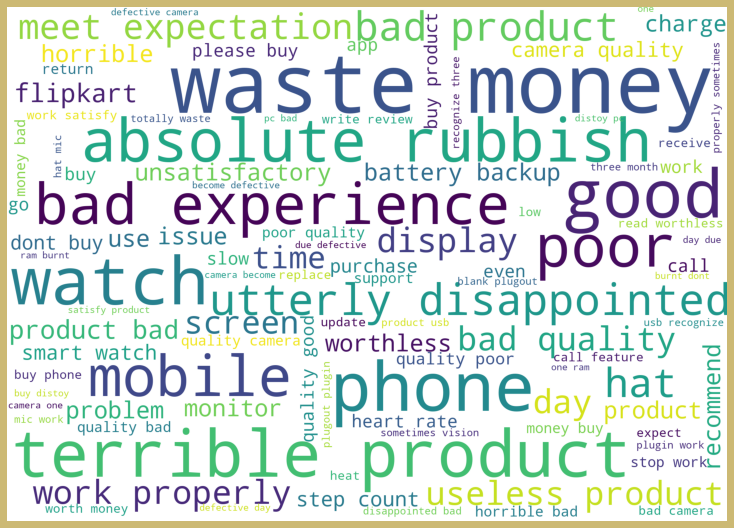

In [66]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

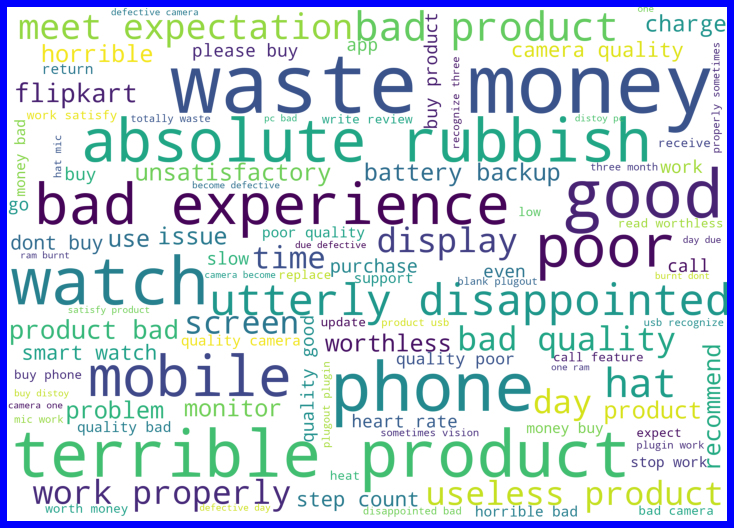

In [67]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [68]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    16993
4     5693
1     2564
3     1691
2      639
Name: Ratings, dtype: int64

# Model Building and Evaluation:


In [69]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

# Converting text data into vectors using Tfidf Vectorizer:


In [70]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [71]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [72]:
#I will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

# Splitting the data into train and test:


In [74]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

# Data Balancing:


In [75]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (20685, 150000)
x_test (6895, 150000)
y_train (20685,)
y_test (6895,)


In [76]:
#Checking the value counts of Ratings column
y.value_counts()

5    16993
4     5693
1     2564
3     1691
2      639
Name: Ratings, dtype: int64

In [77]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 12743, 4: 4282, 1: 1931, 3: 1259, 2: 470})


In [78]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37633, 2: 37633, 3: 37633, 4: 37633, 5: 37633})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 12743, 4: 4282, 1: 1931, 3: 1259, 2: 470})
The number of classes after fit Counter({1: 37633, 5: 37633, 3: 37633, 4: 37633, 2: 37633})


In [87]:
# Importing libraries for ML Algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
#from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(verbosity=0)
#lgb = LGBMClassifier()
sgd = SGDClassifier()

In [90]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [91]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 97.99854967367658
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       633
           2       0.99      0.95      0.97       169
           3       0.94      0.94      0.94       432
           4       0.96      0.97      0.96      1411
           5       0.99      0.99      0.99      4250

    accuracy                           0.98      6895
   macro avg       0.97      0.97      0.97      6895
weighted avg       0.98      0.98      0.98      6895

Confusion Matrix : 
 [[ 629    0    3    1    0]
 [   2  161    2    4    0]
 [   4    0  408   11    9]
 [   1    0   20 1362   28]
 [   1    2    3   47 4197]]

******************************LinearSVC******************************
Accuracy Score: 98.1725888324873
---------------------------------------------------
CL

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

# Cross validation score:


In [94]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 5).mean()*100
    print("Cross validation score :", scores)

In [93]:
for model in [lr,svc,DTC,sgd,rf,xgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 92.75927788766967
******************************LinearSVC******************************
Cross validation score : 94.22410774109929
******************************DecisionTreeClassifier******************************
Cross validation score : 89.5613674934008
******************************SGDClassifier******************************
Cross validation score : 94.22048494887584
******************************RandomForestClassifier******************************
Cross validation score : 92.44381929127474
******************************XGBClassifier******************************


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vivek Rattan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek Rattan\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\Vivek Rattan\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]


# HyperParameter Tuning:


In [95]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [96]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, verbose=10)
GCV.fit(x_train_ns,y_train_ns)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.991 total time=   3.5s
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.993 total time=   2.9s
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.992 total time=   2.7s
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.971 total time=   5.4s
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.975 total time=   5.8s
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END loss

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [97]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'squared_hinge', 'n_jobs': -1, 'penalty': 'l1'}

# Final Model:


In [98]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 97.4329224075417

Confusion Matrix : 
 [[ 626    0    4    1    2]
 [   2  157    3    7    0]
 [   4    1  401   18    8]
 [   3    2   17 1319   70]
 [   3    2    2   28 4215]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       633
           2       0.97      0.93      0.95       169
           3       0.94      0.93      0.93       432
           4       0.96      0.93      0.95      1411
           5       0.98      0.99      0.99      4250

    accuracy                           0.97      6895
   macro avg       0.97      0.95      0.96      6895
weighted avg       0.97      0.97      0.97      6895



# Model Saving:













In [99]:
import joblib
joblib.dump(model,"Ratings_RP.pkl")

['Ratings_RP.pkl']

# Conclusion

In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com.
Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance.
By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words.
After all these steps I have built function to train different algorithms and using various evaluation metrics I have selected SGDClassifier for our final model.
Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got good accuracy score for our final model.